In [1]:
#Import necessary repositories
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Read data and quality check

In [2]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
for i in data:
    print(i, np.unique(data[i]))

age [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64]
sex ['female' 'male']
bmi [15.96  16.815 17.195 17.29  17.385 17.4   17.48  17.67  17.765 17.8
 17.86  17.955 18.05  18.3   18.335 18.5   18.6   18.715 18.905 19.
 19.095 19.19  19.3   19.475 19.57  19.8   19.855 19.95  20.045 20.1
 20.13  20.235 20.3   20.35  20.4   20.425 20.52  20.6   20.615 20.7
 20.79  20.8   20.9   21.01  21.09  21.12  21.28  21.3   21.375 21.4
 21.47  21.5   21.56  21.565 21.66  21.7   21.755 21.78  21.8   21.85
 21.89  21.945 22.    22.04  22.1   22.135 22.22  22.23  22.3   22.42
 22.515 22.6   22.61  22.705 22.77  22.8   22.88  22.895 22.99  23.
 23.085 23.1   23.18  23.2   23.21  23.275 23.3   23.32  23.37  23.4
 23.465 23.54  23.56  23.6   23.65  23.655 23.7   23.75  23.76  23.8
 23.845 23.87  23.9   23.94  23.98  24.035 24.09  24.1   24.13  24.225
 24.3   24.31  24.32  24.4   24.415 24.42  24.51  24.53  24.6   2

In [6]:
# Map data to numeric values
data["sex"] = data["sex"].map({'male':0, 'female':1})
data["smoker"] = data["smoker"].map({'yes':1, 'no':0})
data["region"] = data["region"].map({'northeast':0, 'northwest':1, 'southeast':2, 'southwest':3})

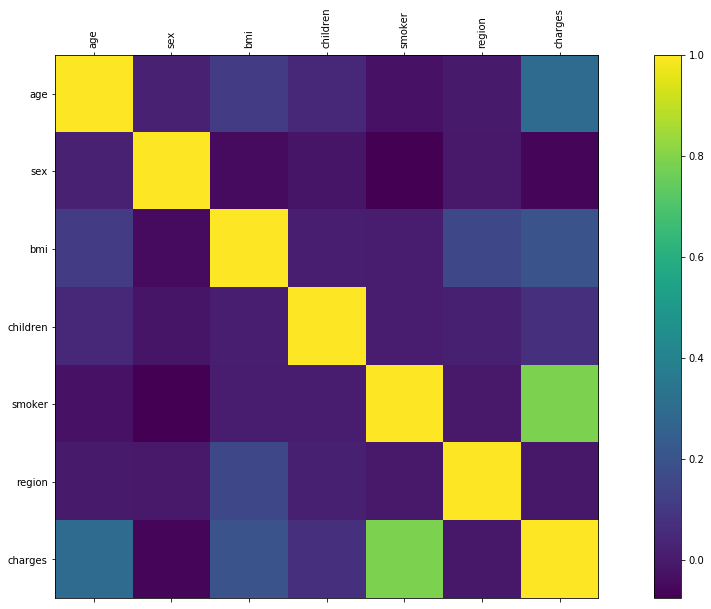

In [7]:
# Check of correlation
plt.rcParams["figure.figsize"] = (20,10)
col = data.columns


fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(data.corr())
fig.colorbar(cax)
ax.set_xticks(np.arange(len(col)))
ax.set_xticklabels(col, rotation=90)
ax.set_yticks(np.arange(len(col)))
ax.set_yticklabels(col);

In [8]:
# Divide data to train and test sets
features = data.drop("charges", axis=1)
label = data["charges"]

X_test, X_train, y_test, y_train = train_test_split(features, label, test_size=0.8)

# Fit models

### Random forest

In [9]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [10]:
# Use the forest's predict method on the training data
predictions_rf = rf.predict(X_train)
# Calculate the absolute errors
errors_rf = abs(predictions_rf - y_train)

## Linear regression

In [11]:
# Instantiate model 
lr = LinearRegression()
# Train the model on training data
lr.fit(X_train, y_train)
# Use the predict method on the training data
predictions_lr = lr.predict(X_train)
# Calculate the absolute errors
errors_lr = abs(predictions_lr - y_train)

Text(0.5, 1.0, 'Train data')

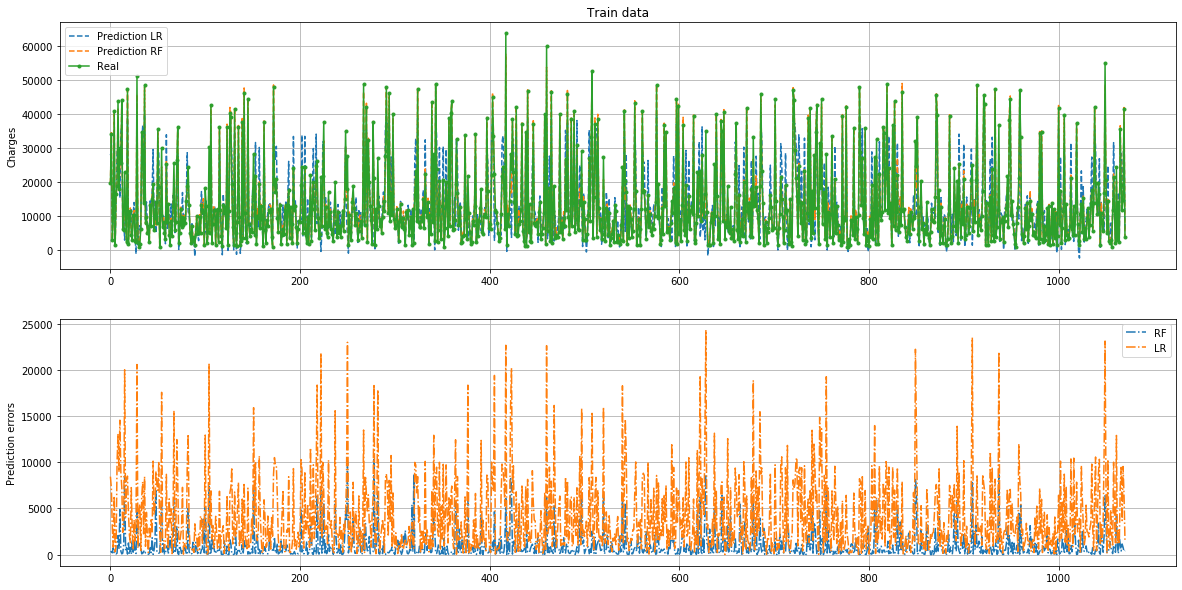

In [12]:
# Show the results for training data of both models on the graphs
x = range(len(y_train))
f, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(x, predictions_lr, linestyle='--', label='Prediction LR')
ax1.plot(x, predictions_rf, linestyle='--', label='Prediction RF')
ax1.plot(x, y_train, marker='.', label='Real')
# axis labels
ax1.set_ylabel('Charges')
# show the legend
ax1.legend()
ax1.grid()

ax2.plot(x, errors_rf, linestyle='-.', label='RF')
ax2.plot(x, errors_lr, linestyle='-.', label='LR')
ax2.set_ylabel('Prediction errors')
ax2.legend()
ax2.grid()
ax1.set_title('Train data')


R^2 for test data for RF = 0.83 
R^2 for test data for LR = 0.73 
R^2 for train data for RF = 0.98 
R^2 for ttrain data for LR = 0.76 


Text(0.5, 1.0, 'Test data')

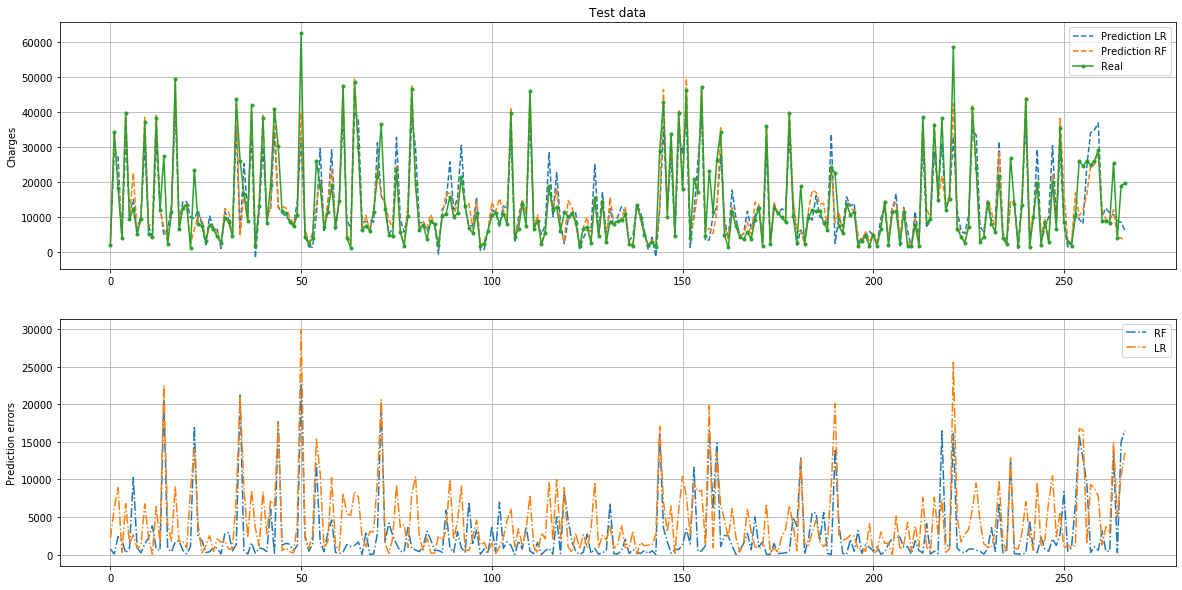

In [13]:
# Show the results for test data of both models on the graphs
# Use the predict methods on the test data and calculate absoulut errors
predictions_rf = rf.predict(X_test)
errors_rf = abs(predictions_rf - y_test)
predictions_lr = lr.predict(X_test)
errors_lr = abs(predictions_lr - y_test)
print('R^2 for test data for RF = %.2f ' %rf.score(X_test,y_test))
print('R^2 for test data for LR = %.2f '%lr.score(X_test,y_test))
print('R^2 for train data for RF = %.2f ' %rf.score(X_train,y_train))
print('R^2 for ttrain data for LR = %.2f ' %lr.score(X_train,y_train))

x = range(len(y_test))
f, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(x, predictions_lr, linestyle='--', label='Prediction LR')
ax1.plot(x, predictions_rf, linestyle='--', label='Prediction RF')
ax1.plot(x, y_test, marker='.', label='Real')
# axis labels
ax1.set_ylabel('Charges')
# show the legend
ax1.legend()
ax1.grid()

ax2.plot(x, errors_rf, linestyle='-.', label='RF')
ax2.plot(x, errors_lr, linestyle='-.', label='LR')
ax2.set_ylabel('Prediction errors')
ax2.legend()
ax2.grid()

ax1.set_title('Test data')

In [14]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(col, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: smoker               Importance: 0.63
Variable: bmi                  Importance: 0.21
Variable: age                  Importance: 0.13
Variable: children             Importance: 0.02
Variable: sex                  Importance: 0.01
Variable: region               Importance: 0.01


We can see that random forest gives as better results for both, training and test sets. In addition we can notice that information about smoking is the most importatnt to predict insurance costs.